# Effect of 11/09 in NY flights 2000-2002

In [1]:
import gc
import glob
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [2]:
# for year in range(1987,2009):
#     filename = "{}.csv.bz2".format(year)
#     urllib.request.urlretrieve("http://stat-computing.org/dataexpo/2009/{}".format(filename),
#                                "../data/{}".format(filename))
#     print(year)

In [3]:
airports = pd.read_csv("../data/airports.csv.gz").query("state == 'NY'")
airports.head()

,iata,airport,city,state,country,lat,long
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
19,06N,Randall,Middletown,NY,USA,41.431566,-74.391917
42,0B8,Elizabeth,Fishers Island,NY,USA,41.251308,-72.031611
54,0G0,North Buffalo Suburban,Lockport,NY,USA,43.103184,-78.703346
57,0G7,Finger Lakes Regional,Seneca Falls,NY,USA,42.880623,-76.781620


In [4]:
df = pd.concat([pd.read_csv(x, index_col=None, encoding="iso-8859-1")
                for x in glob.glob("../data/200[0-2].csv.gz")], axis=0, ignore_index=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2000,1,28,5,1647.0,1647,1906.0,1859,HP,154,...,15,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2000,1,29,6,1648.0,1647,1939.0,1859,HP,154,...,5,47,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2000,1,30,7,NaN,1647,NaN,1859,HP,154,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2000,1,31,1,1645.0,1647,1852.0,1859,HP,154,...,7,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2000,1,1,6,842.0,846,1057.0,1101,HP,609,...,3,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[df.Dest.isin(airports.iata) | df.Origin.isin(airports.iata)].copy()
gc.collect()
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4231,2000,1,1,6,1742.0,1740,2124.0,2120,DL,57,...,4,35,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4232,2000,1,2,7,1741.0,1740,2148.0,2120,DL,57,...,4,47,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4233,2000,1,3,1,1740.0,1740,2105.0,2120,DL,57,...,5,25,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4234,2000,1,4,2,1748.0,1740,2055.0,2120,DL,57,...,5,21,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4235,2000,1,5,3,1740.0,1740,2137.0,2120,DL,57,...,4,58,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
canc = df.groupby(["Year", "Month", "Cancelled"]).size().reset_index().set_index(["Year","Month"])\
         .query("Cancelled == 1").drop(['Cancelled'], axis=1).rename({0:"TotalCancelled"}, axis=1)
canc["Flights"] = df.groupby(["Year", "Month"]).size().reset_index().set_index(["Year","Month"])
canc

TotalCancelled  Flights
Year Month                         
2000 1                3143    35178
     2                1480    33210
     3                 884    35941
     4                1233    33854
     5                1864    35747
     6                2864    35279
     7                1903    37987
     8                2075    39148
     9                1583    37816
     10               1347    40424
     11               1594    38878
     12               3780    39030
2001 1                3206    47397
     2                2640    41871
     3                4362    46511
     4                1485    45507
     5                1380    47140
     6                2685    45591
     7                1757    46778
     8                2342    47830
     9               11699    41921
     10               1203    34827
     11                612    31999
     12                538    31807
2002 1                 649    32985
     2                 416    30075
     3                 480    33907
     4                 537    34119
     5                 699    35590
     6                 994    35229
     7                 741    36670
     8                 510    36648
     9                 239    34151
     10                403    36494
     11                511    34313
     12               1311    34398

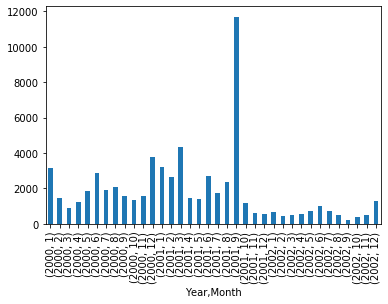

In [7]:
canc.TotalCancelled.plot(kind='bar')

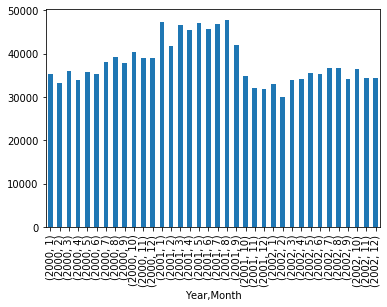

In [8]:
canc.Flights.plot(kind='bar')

In [9]:
canc.reset_index(inplace=True)
canc.index = canc.Year.map(str) + '-' + canc.Month.map(str)
canc.index.name = "Date"
canc.drop(["Year","Month"], axis=1, inplace=True)

In [10]:
canc.to_csv("../data/cancelled.csv")